# Data Wrangling and exploration
## Gathering data

In [1]:
# import libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import os
import requests
import matplotlib.pyplot as plt 
%matplotlib inline
import json
import re

In [2]:
# collect file 1 and sve to dataframe
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# collect file 2 by scraping from internet and save to dataframe
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
#r.content

In [4]:
with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)

In [5]:
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
df2 = pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# collect file 3  and save to dataframe
df = pd.read_json('tweet_json.txt',lines=True)
df3 = df[['id','favorite_count','retweet_count']]
df3.head()

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


## Assessing data
### Visual Assessment

#### Quality
- Some lines are reply to tweet instead of original tweet
- Some lines are retweet instead of original tweet
- df1：some values in the ratings numerator is less than 10
- df1：some values in the ratings denominator is not 10
- df1: there are missing values in the dogs' names
- df1: there are some wrong values in the dogs' names ,like a, an, the, such.



#### Tidiness  
- df1：stages of dogs，one variable is represented into 4 columns(doggo、floofer、pupper、puppo)
- df3：in table twitter the column of tweet id is named 'id', while in the other two tables it is tweet_id.
- only one table is needed, need to merge 3 into 1

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### Programmatic Assessment

In [8]:
# check the basic info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# check the basic info of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
# check the basic info of df3
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [11]:
# value counts of rating_numerator
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# value counts of rating_denominator
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
# value_counts of dog names
df1.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
Buddy             7
Toby              7
Daisy             7
Bailey            7
an                7
Jack              6
Oscar             6
Koda              6
Jax               6
Bella             6
Leo               6
Dave              6
Scout             6
Rusty             6
Milo              6
Stanley           6
Sammy             5
               ... 
Jomathan          1
Zoe               1
Tanner            1
Skittle           1
Fillup            1
Alexanderson      1
Marq              1
Hanz              1
Brooks            1
Bruno             1
Ralphson          1
Harnold           1
Dale              1
Farfle            1
Teddy             1
Marty             1
Linus             1
Superpup          1
Alf               1


In [14]:
# value counts of different dog stage
df1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
# value counts of different dog stage
df1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
# value counts of different dog stage
df1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
# value counts of different dog stage
df1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
# check duplicates
all_columns = pd.Series(list(df1)+list(df2)+list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [19]:
# check duplicates in df1
df1[df1.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
# check duplicates in df2
df2[df2.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
# check duplicates in df3
df3[df3.duplicated()]

,id,favorite_count,retweet_count


#### Quality
- As we can see from column‘in_reply_to_status_id’, 78 obs are reply instead of original tweet
- As we can see from column’retweeted_status_id‘, 181 obs are retweet instead of original tweet
- expanded_url column has missing values
- df1: There are some abnormal values in rating_numerators（0、1、2、3、4、5、6、7、8、9）
- df1: There are someabnormal values in rating_denominators 11、50、80、20 and so on）
- df1：There are missing values in the dog names
- df1：There are wrong values in the dog names（like a,an,the,such）
- df1：Missing values in column ‘doggo’、‘floofer’、‘pupper’、‘puppo’
- There are 2356 obs in df1, 2352 obs in df2, while 2075 obs in df3

### Visual Assessment + Programmatic Assessment Summary
#### Quality
##### df1 table
- （3）column‘in_reply_to_status_id’, 78 obs are reply instead of original tweet
- （4）column’retweeted_status_id‘, 181 obs are retweet instead of original tweet
- （5）expanded_url column has missing values
- （8）There are some abnormal values in rating_numerators（0、1、2、3、4、5、6、7、8、9）
- （9）There are some abnormal values in rating_denominators 11、50、80、20 and so on）
- （10）There are missing values in the dog names
- （11）There are wrong values in the dog names（like a,an,the,such）

##### df2 table and df3 table
- （6）There are 2356 obs in df1, 2352 obs in df2, while 2075 obs in df3


#### Tidiness  
- (7) df1: stages of dogs，one variable is represented into 4 columns(doggo、floofer、pupper、puppo)
- (1) in table twitter the column of tweet id is named 'id', while in the other two tables it is tweet_id.
- (2) only one table is needed, need to merge 3 into 1


## Clean

In [22]:
# get copy of the s datasets
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

#### Issue 1
 In table twitter the column of tweet id is named 'id', while in the other two tables it is tweet_id.
##### Define
change the column name with replace function

##### Code

In [23]:
df3_clean = df3_clean.rename(columns={'id':'tweet_id'})

##### Test

In [24]:
df3_clean.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


#### Issue 2
only one table is needed, need to merge 3 into 1
##### Define
merge the 3 dataset with merge function and name the new dataframe df

##### Code

In [25]:
df_combined = pd.merge(df1_clean,df2_clean,how='left')
df = pd.merge(df_combined,df3_clean,how='left')

##### Test

In [26]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39492.0,8842.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33786.0,6480.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25445.0,4301.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42863.0,8925.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41016.0,9721.0


In [27]:
# check the basic info of the new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

#### Issue 3
column‘in_reply_to_status_id’, 78 obs are reply instead of original tweet
##### Define
Filter and save obs where ‘in_reply_to_status_id’ value is null, drop columns 'in_reply_to_status_id ', 'in_reply_to_user_id'
##### Code

In [28]:
df = df[df.in_reply_to_status_id.isnull()]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
jpg_url                       2052

In [30]:
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

##### Test

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2278 non-null int64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
jpg_url                       2052 non-null object
img_num                       2052 non-null float64
p1                           

#### Issue 4
column’retweeted_status_id‘, 181 obs are retweet instead of original tweet
##### Define
Filter and save obs where ’retweeted_status_id‘ value is null, and drop columns 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
##### Code

In [32]:
df = df[df.retweeted_status_id.isnull()]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2097 non-null int64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null float64
p1                            1971 

In [34]:
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

##### Test

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

#### Issue 5 / 6
expanded_url column has missing values
There are 2356 obs in df1, 2352 obs in df2, while 2075 obs in df3
##### Define
drop the obs with missing value
##### Code

In [36]:
df = df.dropna(axis=0,how='any')

##### Test

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

#### Issue 7
df1: stages of dogs，one variable is represented into 4 columns(doggo、floofer、pupper、puppo)
##### Define
Use str.replace function to change the 'None' values in columns 'doggo', 'floofer', 'pupper',’puppo‘ to null, then use str.cat function to merge ’flooper‘,'pupper','puppo' columns to column 'doggo',rename column 'doggo' to 'stage',drop 'flooper', 'pupper', 'puppo' columns.
##### Code

In [38]:
df.doggo = df.doggo.str.replace('None','')

In [39]:
df.floofer = df.floofer.str.replace('None','')

In [40]:
df.pupper = df.pupper.str.replace('None','')

In [41]:
df.puppo = df.puppo.str.replace('None','')

In [42]:
df.doggo = df.floofer.str.cat(df.doggo,sep='')

In [43]:
df.doggo = df.pupper.str.cat(df.doggo,sep='')

In [44]:
df.doggo = df.puppo.str.cat(df.doggo,sep='')

In [45]:
df.doggo = df.doggo.str.strip()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

In [47]:
df = df.rename(columns={'doggo':'stage'})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stage                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

In [49]:
df = df.drop(['floofer','pupper','puppo'],axis=1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stage                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
favorite_count        1971 non-n

In [51]:
df.stage = df.stage.replace('',np.nan)

##### Test

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null object
favorite_count        1971 non-nu

#### Issue 8 / 9
There are some abnormal values in rating_numerators（0、1、2、3、4、5、6、7、8、9）
There are some abnormal values in rating_denominators 11、50、80、20 and so on）
##### Define：
First try to reextract the rating_numerators and rating_denominators from the text column to see if this could fix this issue. Or look up the right numbers for those abnormal values in the column

##### Code

In [53]:
# 412 obs with abnormal rating_numerators
df[df.rating_numerator < 10].shape

(412, 22)

In [54]:
# 17 obs with abnormal rating_denominators
df[df.rating_denominator!=10].shape

(17, 22)

In [55]:
# print out the texts
texts = df.text
#texts.apply(lambda x: print(x))


In [56]:
# extract the rating_numerators and rating_denominators from the text column, get a ratings dataframe
ratings = df.text.str.extract(r'(\d+\.?\d*)/(\d+)',expand=True)

In [57]:
# rename the columns of ratings dataframe 'rating_numerator','rating_denominator'
ratings.columns = ['rating_numerator','rating_denominator']

In [58]:
# check basic info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      1971 non-null object
rating_denominator    1971 non-null object
dtypes: object(2)
memory usage: 46.2+ KB


In [59]:
# the values are string type, convert to int type
ratings = ratings.astype(float).round(decimals=0).astype(int)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 2 columns):
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
dtypes: int64(2)
memory usage: 46.2 KB


In [60]:
# there are still 411 obs with the abnormal rating_numerators, that's not helping too much
ratings[ratings.rating_numerator < 10].shape

(411, 2)

In [61]:
# there are still 17 obs with the abnormal rating_denominator, that's not helping too much either
ratings[ratings.rating_denominator != 10].shape

(17, 2)

In [62]:
# we will look up the test and fix some of the abnormal values
df.loc[df.rating_denominator!=10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [63]:
#df[df.rating_denominator!=10].text.apply(lambda x :print(x))

After double check, most abnormal values are already abnormal in the test, but we can find some of the correct values in the text:
- 1068行正确评分是14/10
- rating of line  1068 should be 14/ 10
- rating of line 1165 should be 13 / 10
- rating of line 1202 should be 11 / 10
- rating of line 1662 should be 10/ 10


In [64]:
# assign correct rating values to line 1068
df.loc[1068,['rating_numerator','rating_denominator']]=14,10

In [65]:
# assign correct rating values to line 1165
df.loc[1165,['rating_numerator','rating_denominator']]=13,10

In [66]:
# assign correct rating values to line 1202
df.loc[1202,['rating_numerator','rating_denominator']]=11,10

In [67]:
# assign correct rating values to line 1662
df.loc[1622,['rating_numerator','rating_denominator']]=10,10

In [68]:
df[df.rating_denominator!=10].shape

(14, 22)

In [69]:
df.loc[[1068,1165,1202,1662]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,37704.0,15029.0
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,None,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,4473.0,1754.0
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,2562.0,246.0
1662,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,NaN,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,...,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,39005.0,18393.0


In [70]:
# subset the obs where the rating denominator is correct
df = df[df.rating_denominator==10]

In [71]:
# subset the obs where the rating numerator is correct
df = df[df.rating_numerator>=10]

#### Test

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2350
Data columns (total 22 columns):
tweet_id              1549 non-null int64
timestamp             1549 non-null object
source                1549 non-null object
text                  1549 non-null object
expanded_urls         1549 non-null object
rating_numerator      1549 non-null int64
rating_denominator    1549 non-null int64
name                  1549 non-null object
stage                 259 non-null object
jpg_url               1549 non-null object
img_num               1549 non-null float64
p1                    1549 non-null object
p1_conf               1549 non-null float64
p1_dog                1549 non-null object
p2                    1549 non-null object
p2_conf               1549 non-null float64
p2_dog                1549 non-null object
p3                    1549 non-null object
p3_conf               1549 non-null float64
p3_dog                1549 non-null object
favorite_count        1549 non-nu

In [73]:
df.rating_numerator.value_counts()

12      445
10      418
11      393
13      254
14       34
1776      1
420       1
75        1
27        1
26        1
Name: rating_numerator, dtype: int64

In [74]:
df.rating_denominator.value_counts()

10    1549
Name: rating_denominator, dtype: int64

#### Issue 10 / 11
There are missing values in the dog names
There are wrong values in the dog names（like a,an,the,such）
##### Define
conver the missing value None and wrong values(a,an,the,such) to NaN
##### Code

In [75]:
df.name = df.name.replace('None',np.nan)

In [76]:
df.name = df.name.replace('a',np.nan)

In [77]:
df.name = df.name.replace('an',np.nan)

In [78]:
df.name = df.name.replace('the',np.nan)

In [79]:
df.name = df.name.replace('such',np.nan)

##### Test

In [80]:
df.name.value_counts()

Charlie      11
Lucy         10
Cooper        9
Oliver        9
Tucker        8
Winston       7
Penny         7
Sadie         7
Koda          6
Daisy         6
Bo            6
Jax           5
Stanley       5
Milo          5
Leo           5
Toby          5
Lola          5
Louis         5
Oscar         4
Oakley        4
Sophie        4
Bailey        4
Dave          4
Bentley       4
Rusty         4
Derek         4
Winnie        4
Cassie        4
Archie        4
Scout         4
             ..
Bob           1
Grizzwald     1
Canela        1
Glenn         1
Ronnie        1
Hunter        1
Julio         1
Kevon         1
Marvin        1
Colin         1
Jerome        1
Jaspers       1
Siba          1
Emma          1
Pancake       1
Callie        1
Tilly         1
Mosby         1
Trigger       1
Astrid        1
Remus         1
Pipsy         1
Saydee        1
Jennifur      1
Linda         1
Lupe          1
Mimosa        1
Rumble        1
Steven        1
DonDon        1
Name: name, Length: 787,

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 2350
Data columns (total 22 columns):
tweet_id              1549 non-null int64
timestamp             1549 non-null object
source                1549 non-null object
text                  1549 non-null object
expanded_urls         1549 non-null object
rating_numerator      1549 non-null int64
rating_denominator    1549 non-null int64
name                  1119 non-null object
stage                 259 non-null object
jpg_url               1549 non-null object
img_num               1549 non-null float64
p1                    1549 non-null object
p1_conf               1549 non-null float64
p1_dog                1549 non-null object
p2                    1549 non-null object
p2_conf               1549 non-null float64
p2_dog                1549 non-null object
p3                    1549 non-null object
p3_conf               1549 non-null float64
p3_dog                1549 non-null object
favorite_count        1549 non-nu

#### Save the cleaned dataset

In [82]:
df.to_csv('twitter_archive_master.csv',index=False)

## Exploration and data visualization

In [83]:
# load dataset
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39492.0,8842.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33786.0,6480.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25445.0,4301.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42863.0,8925.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41016.0,9721.0


In [84]:
# convert data type of favorite_count to int
df.favorite_count = df.favorite_count.astype(int)

In [85]:
# convert data type of retweet_count to int
df.retweet_count = df.retweet_count.astype(int)

In [86]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39492,8842
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33786,6480
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25445,4301
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42863,8925
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41016,9721


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 22 columns):
tweet_id              1549 non-null int64
timestamp             1549 non-null object
source                1549 non-null object
text                  1549 non-null object
expanded_urls         1549 non-null object
rating_numerator      1549 non-null int64
rating_denominator    1549 non-null int64
name                  1119 non-null object
stage                 259 non-null object
jpg_url               1549 non-null object
img_num               1549 non-null float64
p1                    1549 non-null object
p1_conf               1549 non-null float64
p1_dog                1549 non-null bool
p2                    1549 non-null object
p2_conf               1549 non-null float64
p2_dog                1549 non-null bool
p3                    1549 non-null object
p3_conf               1549 non-null float64
p3_dog                1549 non-null bool
favorite_count        1549 non-null int

#### Question 1：What's the top 10 popular dog names

In [88]:
# get the value counts of top 10 names
name_count = df.name.value_counts()[:10]
name_count

Charlie    11
Lucy       10
Cooper      9
Oliver      9
Tucker      8
Winston     7
Penny       7
Sadie       7
Koda        6
Daisy       6
Name: name, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

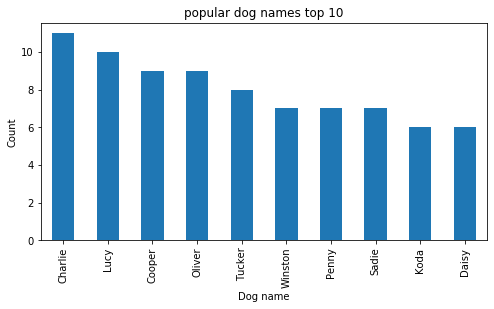

In [89]:
# bar chart of top 10 popular dog names
name_count.plot(kind='bar',figsize=(8,4))
plt.title('popular dog names top 10')
plt.xlabel('Dog name')
plt.ylabel('Count')
plt.show

**Conclusion:**

The top 10 popular names are Charlie,Lucy,Cooper,Oliver,Tucker,Sadie,Winston,Penny,Daisy,Bo          

#### Question 2：Is there a correlation between favorite_count and retweet_count

Text(0.5, 1.0, 'correlation between favorite count and retweet count')

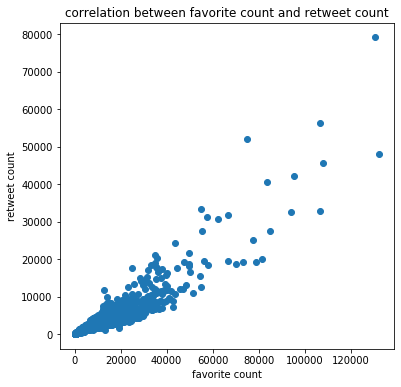

In [90]:
# scatter plot of favorite_count and retweet_count
plt.figure(figsize=(6,6))
plt.scatter([df.favorite_count],[df.retweet_count])
plt.xlabel('favorite count')
plt.ylabel('retweet count')
plt.title('correlation between favorite count and retweet count')

**Conclusion**
As we can see from the plot, as value of x axis increase value of y axis increase ,favorite_count and retweet_count are positively correlated.

#### What's the stage of the top 3 dogs

In [91]:
df = df[['stage','rating_numerator']]
df = df.dropna(axis=0,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 9 to 1364
Data columns (total 2 columns):
stage               259 non-null object
rating_numerator    259 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.1+ KB


In [92]:
df.sort_values('rating_numerator',ascending=False)

,stage,rating_numerator
543,pupper,27
9,doggo,14
748,pupper,14
291,puppo,14
247,doggo,14
307,pupper,14
1130,pupper,14
312,doggo,14
325,doggo,14
326,doggo,14


**Conclusion**
##### We can see that for the dogs who have a stage info, the rating_numerator of the top 3 dogs are 27，14，14； and their stages are pupper，doggo,pupper